In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def open_file():
    with open('../data/results/component_correlation_df_num_comp_10.pickle', "rb") as input_file:
        return pickle.load(input_file)

In [3]:
def parse_index_name(name):
    name_array = name.split('_')
    subject = name_array[1]
    component = name_array.pop()
    if 'stim-period' in name:
        stimulus = name_array[3] + 'p'
    elif 'stimulus' in name:
        stimulus = name_array[3] + 's'
    else:
        stimulus = 'None'
    return subject, stimulus, component

In [4]:
analysis_df = open_file()

In [5]:
index_counter = 0
name_2_deconstruct = pd.Series(analysis_df.index).apply(lambda name: pd.Series(parse_index_name(name)))
for name in analysis_df.columns:
    temp_df = pd.DataFrame()
    temp_df['corr'] = analysis_df[name][0:index_counter]
    subject_1, stimulus_1, component_1 = parse_index_name(name)
    temp_df['subject_1'] = subject_1
    temp_df['stimulus_1'] = stimulus_1
    temp_df['component_1'] = component_1
    temp_df['subject_2'] = name_2_deconstruct[0][0:index_counter].values
    temp_df['stimulus_2'] = name_2_deconstruct[1][0:index_counter].values
    temp_df['component_2'] = name_2_deconstruct[2][0:index_counter].values
    index_counter = index_counter + 1
    if index_counter <= 1:
        query_df = temp_df
    else:
        query_df = pd.concat([query_df,temp_df], ignore_index=True)

In [6]:
query_df['spearman_corr'] = [i[0] for i in query_df['corr'].values]
query_df['geo_corr'] = [i[1] for i in query_df['corr'].values]
del query_df['corr']

In [7]:
query_df

,subject_1,stimulus_1,component_1,subject_2,stimulus_2,component_2,spearman_corr,geo_corr
0,10,None,1,10,None,0,-0.030699,9.791837
1,10,None,2,10,None,0,0.009004,4.025525
2,10,None,2,10,None,1,-0.227117,3.915020
3,10,None,3,10,None,0,0.069915,6.470105
4,10,None,3,10,None,1,0.165358,5.880558
...,...,...,...,...,...,...,...,...
2507675,7,None,9,7,None,4,0.043161,7.059060
2507676,7,None,9,7,None,5,-0.099372,7.271046
2507677,7,None,9,7,None,6,0.196047,5.312906
2507678,7,None,9,7,None,7,-0.130290,4.638494


In [11]:
across_fish_same_stimulus =query_df[
    (query_df.subject_1 != query_df.subject_2) & (query_df.stimulus_1 == query_df.stimulus_2)
]
across_fish_diff_stimulus =query_df[
    (query_df.subject_1 != query_df.subject_2) & (query_df.stimulus_1 != query_df.stimulus_2)
]
within_fish_same_stimulus =query_df[
    (query_df.subject_1 == query_df.subject_2) & (query_df.stimulus_1 == query_df.stimulus_2)
]
within_fish_diff_stimulus =query_df[
    (query_df.subject_1 == query_df.subject_2) & (query_df.stimulus_1 != query_df.stimulus_2)
]

Spearman Correlation:  0.007042048252716101


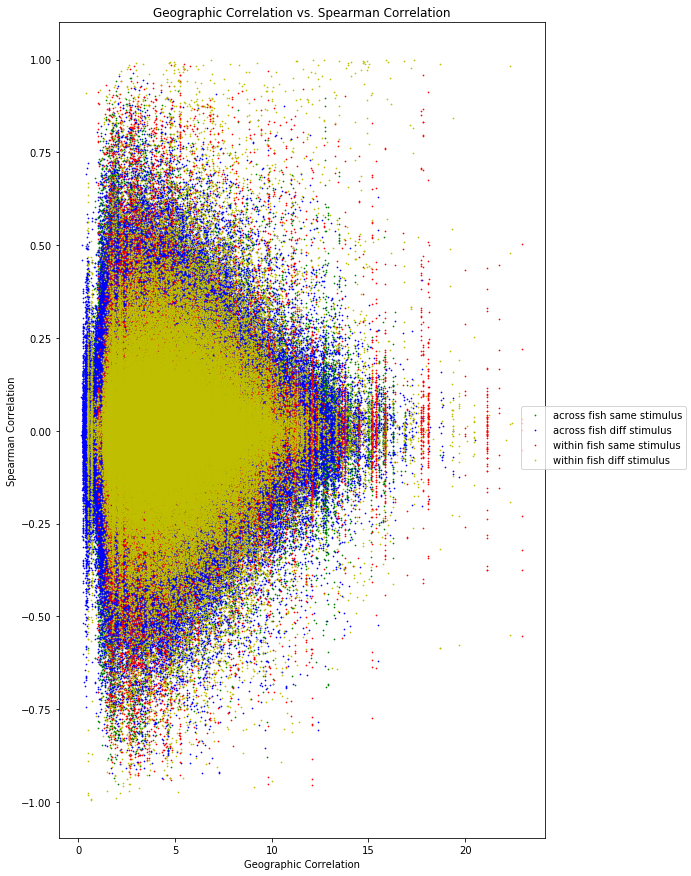

Spearman Correlation:  0.006250195139200335


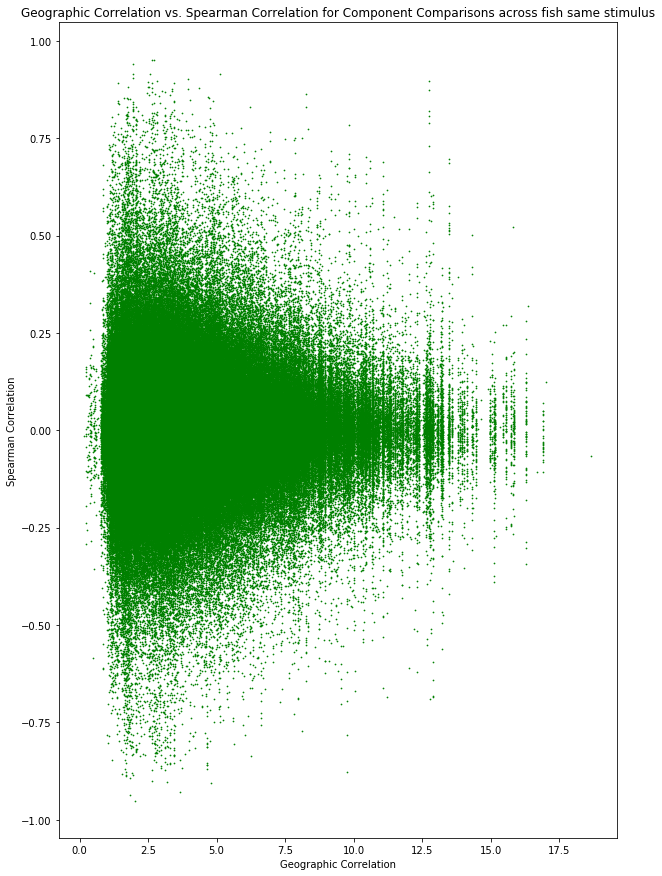

Spearman Correlation:  0.005424647997443651


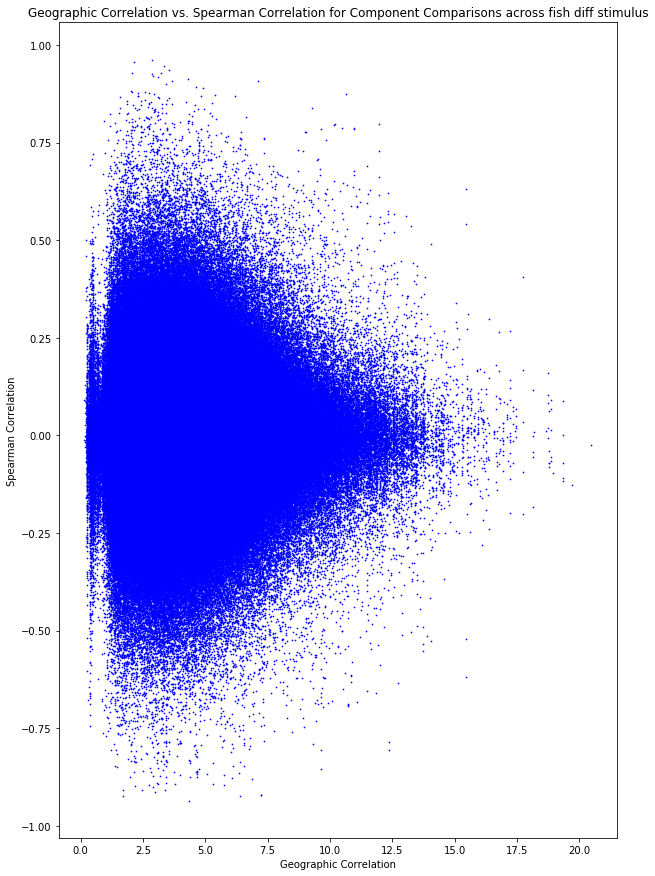

Spearman Correlation:  0.01724026621461522


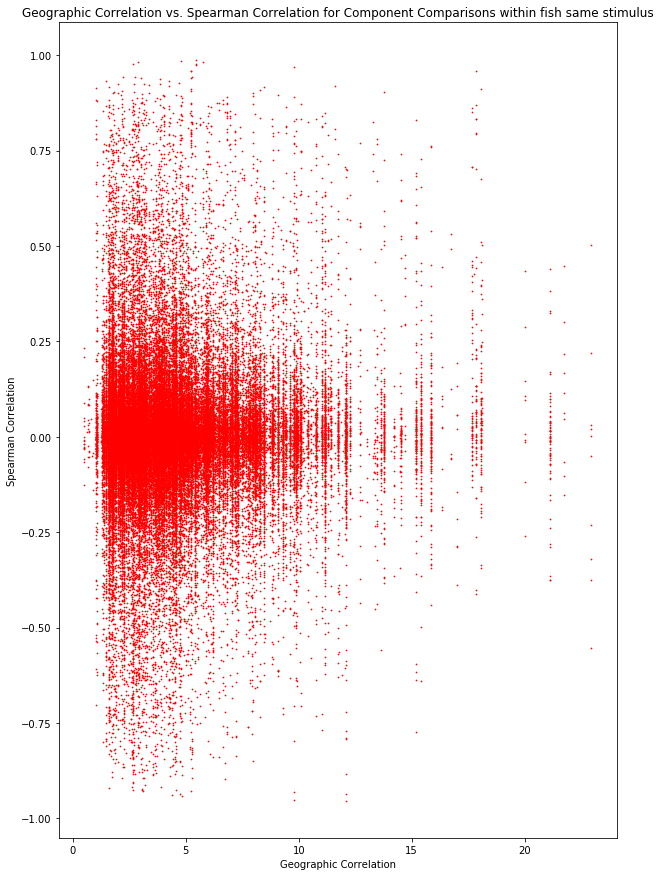

Spearman Correlation:  0.023231213793852727


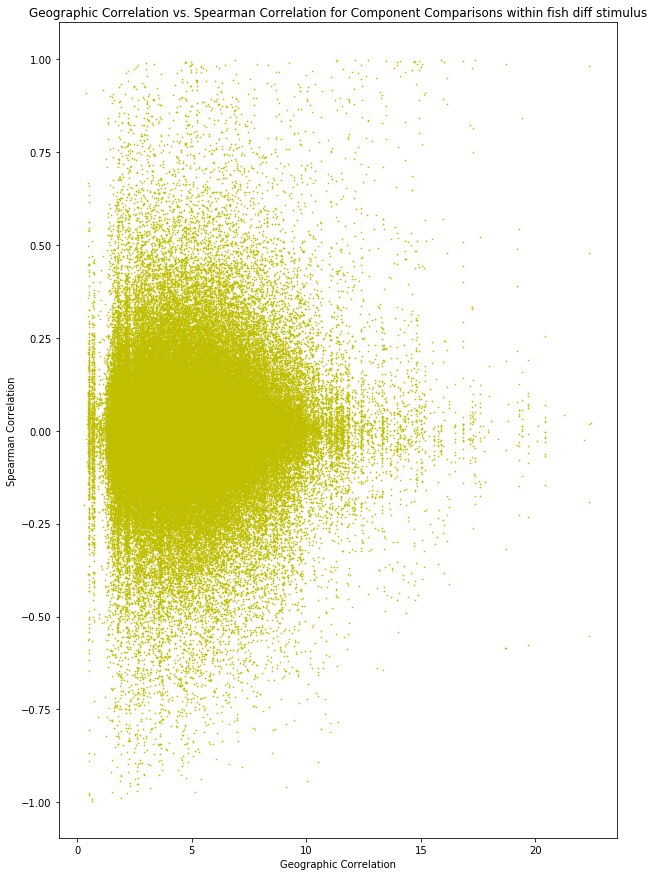

In [16]:
print('Spearman Correlation: ', str(stats.spearmanr(query_df['geo_corr'],query_df['spearman_corr'])[0]))
fig = plt.figure(figsize=(10,15))
axis = fig.add_subplot(111)

plt.scatter(across_fish_same_stimulus.geo_corr, across_fish_same_stimulus.spearman_corr, label='across fish same stimulus', s=.5, c='g')
plt.scatter(across_fish_diff_stimulus.geo_corr, across_fish_diff_stimulus.spearman_corr, label='across fish diff stimulus', s=.5, c='b')
plt.scatter(within_fish_same_stimulus.geo_corr, within_fish_same_stimulus.spearman_corr, label='within fish same stimulus', s=.5, c='r')
plt.scatter(within_fish_diff_stimulus.geo_corr, within_fish_diff_stimulus.spearman_corr, label='within fish diff stimulus', s=.5, c='y')
fig.legend(loc='center right')
fig.subplots_adjust(right=.8)
plt.title('Geographic Correlation vs. Spearman Correlation')
plt.xlabel('Geographic Correlation')
plt.ylabel('Spearman Correlation')
plt.show()

print('Spearman Correlation: ', str(stats.spearmanr(across_fish_same_stimulus['geo_corr'],across_fish_same_stimulus['spearman_corr'])[0]))
fig=plt.figure(figsize=(10,15))
plt.scatter(across_fish_same_stimulus.geo_corr, across_fish_same_stimulus.spearman_corr, label='across fish same stimulus', s=.5, c='g')
plt.title('Geographic Correlation vs. Spearman Correlation for Component Comparisons across fish same stimulus')
plt.xlabel('Geographic Correlation')
plt.ylabel('Spearman Correlation')
plt.show()
print('Spearman Correlation: ', str(stats.spearmanr(across_fish_diff_stimulus['geo_corr'],across_fish_diff_stimulus['spearman_corr'])[0]))
fig=plt.figure(figsize=(10,15))
plt.scatter(across_fish_diff_stimulus.geo_corr, across_fish_diff_stimulus.spearman_corr, label='across fish diff stimulus', s=.5, c='b')
plt.title('Geographic Correlation vs. Spearman Correlation for Component Comparisons across fish diff stimulus')
plt.xlabel('Geographic Correlation')
plt.ylabel('Spearman Correlation')
plt.show()
print('Spearman Correlation: ', str(stats.spearmanr(within_fish_same_stimulus['geo_corr'],within_fish_same_stimulus['spearman_corr'])[0]))
fig=plt.figure(figsize=(10,15))
plt.scatter(within_fish_same_stimulus.geo_corr, within_fish_same_stimulus.spearman_corr, label='within fish same stimulus', s=.5, c='r')
plt.title('Geographic Correlation vs. Spearman Correlation for Component Comparisons within fish same stimulus')
plt.xlabel('Geographic Correlation')
plt.ylabel('Spearman Correlation')
plt.show()
print('Spearman Correlation: ', str(stats.spearmanr(within_fish_diff_stimulus['geo_corr'],within_fish_diff_stimulus['spearman_corr'])[0]))
fig=plt.figure(figsize=(10,15))
plt.scatter(within_fish_diff_stimulus.geo_corr, within_fish_diff_stimulus.spearman_corr, label='within fish diff stimulus', s=.5, c='y')
plt.title('Geographic Correlation vs. Spearman Correlation for Component Comparisons within fish diff stimulus')
plt.xlabel('Geographic Correlation')
plt.ylabel('Spearman Correlation')
plt.show()

In [26]:
within_fish_same_stimulus[(within_fish_same_stimulus.spearman_corr > .75) &
                          (within_fish_same_stimulus.component_1 == within_fish_same_stimulus.component_2)]

,subject_1,stimulus_1,component_1,subject_2,stimulus_2,component_2,spearman_corr,geo_corr
18135,10,None,0,10,None,0,0.759710,15.859238
26555,10,None,0,10,None,0,0.761726,15.859238
26786,10,None,1,10,None,1,0.831895,10.113690
34181,10,None,1,10,None,1,0.870554,10.113690
110675,12,None,0,12,None,0,0.868019,17.843122
...,...,...,...,...,...,...,...,...
2494241,7,None,3,7,None,3,0.825942,13.269476
2496475,7,None,4,7,None,4,0.919594,11.610155
2496485,7,None,4,7,None,4,0.805031,11.610155
2498710,7,None,5,7,None,5,0.769278,12.706512


In [28]:
query_df[query_df.duplicated(subset=['subject_1', 'stimulus_1', 'component_1', 'subject_2', 'stimulus_2', 'component_2'])]

,subject_1,stimulus_1,component_1,subject_2,stimulus_2,component_2,spearman_corr,geo_corr
14535,10,None,1,10,None,0,0.084250,9.791837
14705,10,None,1,10,None,0,0.133288,9.791837
14706,10,None,2,10,None,0,-0.053394,4.025525
14707,10,None,2,10,None,1,-0.021400,3.915020
14876,10,None,2,10,None,0,-0.113016,4.025525
...,...,...,...,...,...,...,...,...
2507675,7,None,9,7,None,4,0.043161,7.059060
2507676,7,None,9,7,None,5,-0.099372,7.271046
2507677,7,None,9,7,None,6,0.196047,5.312906
2507678,7,None,9,7,None,7,-0.130290,4.638494


In [24]:
# Are there patterns of stimulus component correlation within fish?
query_df[query_df.subject_1 == query_df.subject_2]
# Are comps from diff fish consistently correlated?

# Which stimuli tend to be most correlated?
#What do those stimuli mean?
#Same for geographic corr
# Are there components correlated regardless of stimuli?
# What stimuli are dispropotionally correlated?
#Does this depend on the sequence of stimuli?
# Can we identify the components of the original researchers?